In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
%matplotlib inline

In [33]:
def euler_method(f, h=0.1, steps=5, y0=0, t0=0):
    # step, t_k, y_k, f(t_k, y_k), h, f*h
    data = []
    t = t0
    y = y0
    for step in range(steps+1):
        data.append((step, t, y, f(t, y), h, f(t, y)*h))
        y = y + f(t,y)*h
        t = t + h
    return data

def runge_2order(f, h=0.1, t0=0, y0=0, steps=5):
    data = []
    t = t0
    y = y0
    for step in range(steps+1):
        s1 = f(t,y)
        s2 = f(t+h, y+h*s1)
        datum = (step, t, y, s1, s2, h, h*(s1+s2)*.5)
        data.append(datum)
        y = y + h*(s1 + s2)*.5
        t = t + h
    return data

def runge_4order(f, h=0.1, t0=0, y0=0, steps=5):
    data = []
    t = t0
    y = y0
    for step in range(steps+1):
        s1 = f(t,y)
        s2 = f(t + h/2, y + h*s1/2)
        s3 = f(t + h/2, y + h*s2/2)
        s4 = f(t + h, y + h*s3)
        datum = (step, t, y, s1, s2, s3, s4, h)
        data.append(datum)
        y = y + h*(s1 + 2*s2 + 2*s3 + s4)/6
        t = t + h
    return data

In [5]:
def f(t,y):
    return y
data = euler_method(f, h=0.1, steps=5, y0=1, t0=0)

In [23]:
data1

[(0, 0, 1, 1.0, 1, 1.0),
 (1, 1, 0.5838531634528576, -0.24296864697894838, 1, -0.24296864697894838),
 (2, 2, 0.20222126764085752, -0.13218064159639967, 1, -0.13218064159639967),
 (3, 3, 0.39638812015838004, 0.3806000949572715, 1, 0.3806000949572715),
 (4, 4, 0.338713635274003, -0.04928284538380583, 1, -0.04928284538380583)]

In [43]:
def make_graph(ode_method, f, g, y0=1, t0=0, xmin=0, xmax=4,
               ymin=0, ymax=2, xtickmultiplier=1, ytickmultiplier=0.5,
               savename="test.pdf"):
    FIGSIZEX = 4
    FIGSIZEY = 4

    #def f(t,y):
    #    return y*math.cos(2*t)
    steps1 = (xmax - xmin)/1
    data1 = ode_method(f, h=1, steps=int(steps1), y0=y0, t0=t0)
    steps5 = (xmax - xmin)/.5
    data5 = ode_method(f, h=0.5, steps=int(steps5), y0=y0, t0=t0)
    steps01 = (xmax - xmin)/0.1
    data01 = ode_method(f, h=0.1, steps=int(steps01), y0=y0, t0=t0)
    steps005 = (xmax - xmin)/0.05
    data005 = ode_method(f, h=0.05, steps=int(steps005), y0=y0, t0=t0)

    def give_xys(data):
        xs = []
        ys = []
        for d in data:
            xs.append(d[1])
            ys.append(d[2])
        return xs, ys

    #plt.scatter(xs2, ys2, marker="+", color="b")
    #plt.scatter(xs1, ys1, marker="x", color="r")
    #plt.scatter(xs5, ys5, marker=".", color="g")
    #plt.plot(xs, ys, color="k")

    def make_subplot(xs, ys, gxs, gys):
        plt.scatter(xs, ys, color='k', edgecolor='', s=9)
        plt.plot(gxs, gys, color='b')
        axes = plt.gca()
        axes.spines['top'].set_visible(False)
        axes.spines['right'].set_visible(False)
        xticks = [xtickmultiplier*(-10 + x) for x in range(21)]
        yticks = [ytickmultiplier*(-20 + x) for x in range(41)]
        axes.yaxis.set_ticks_position('left')
        axes.xaxis.set_ticks_position('bottom')
        plt.xticks(xticks)
        plt.yticks(yticks)
        plt.xlim([xmin, xmax])
        plt.ylim([ymin, ymax])
        #plt.xlabel("x")
        #plt.ylabel("y")
        #axes.grid(True, linestyle='--')

    xs1, ys1 = give_xys(data1)
    xs5, ys5 = give_xys(data5)
    xs01, ys01 = give_xys(data01)
    xs005, ys005 = give_xys(data005)

    #def g(t):
    #    return math.exp(.5 * math.sin(2*t))
    gxs = np.linspace(xmin, xmax)
    gys = np.array(list(map(g, gxs)))

    plt.figure(1)
    plt.subplot(221)
    make_subplot(xs1, ys1, gxs, gys)
    plt.subplot(222)
    make_subplot(xs5, ys5, gxs, gys)
    plt.subplot(223)
    make_subplot(xs01, ys01, gxs, gys)
    plt.subplot(224)
    make_subplot(xs005, ys005, gxs, gys)

    fig = plt.gcf()
    fig.set_size_inches(FIGSIZEX, FIGSIZEY)
    fig.savefig(savename, bbox_inches='tight')

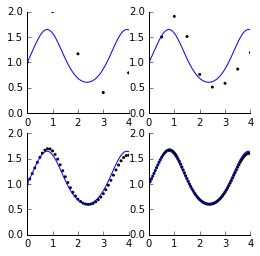

In [41]:
def f(t,y):
    return y*math.cos(2*t)

def g(t):
    return math.exp(.5 * math.sin(2*t))
make_graph(euler_method, f, g)

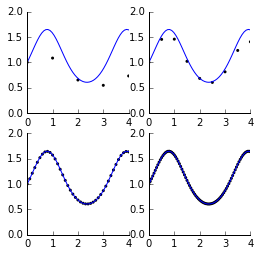

In [31]:
make_graph(runge_2order, f, g, savename="2_runge2.pdf")

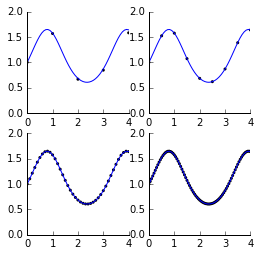

In [34]:
make_graph(runge_4order, f, g, savename="2_runge4.pdf")

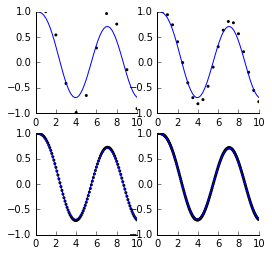

In [47]:
def f(t,y):
    return -y + math.cos(t)

def g(t):
    return .5*math.cos(t) + .5*math.sin(t) + .5*math.exp(-t)

make_graph(euler_method, f, g, savename="4_euler.pdf", xtickmultiplier=2, xmin=0, xmax=10, ymin=-1, ymax=1)

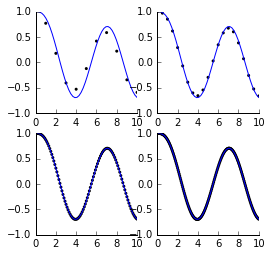

In [48]:
make_graph(runge_2order, f, g, savename="4_runge2.pdf", xtickmultiplier=2, xmin=0, xmax=10, ymin=-1, ymax=1)

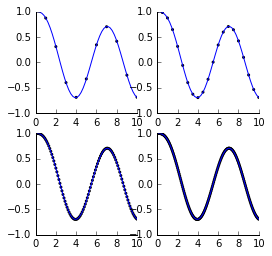

In [49]:
make_graph(runge_4order, f, g, savename="4_runge4.pdf", xtickmultiplier=2, xmin=0, xmax=10, ymin=-1, ymax=1)

In [50]:
def give_xys(data):
    xs = []
    ys = []
    for d in data:
        xs.append(d[1])
        ys.append(d[2])
    return xs, ys

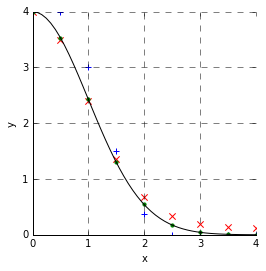

In [54]:
def f(t,y):
    return -t*y

def g(t):
    return 4*math.exp(-t**2/2)
gxs = np.linspace(0, 4)
gys = np.array(list(map(g, gxs)))

data_euler = euler_method(f, h=0.5, steps=8, y0=4, t0=0)
data_runge2 = runge_2order(f, h=0.5, steps=8, y0=4, t0=0)
data_runge4 = runge_4order(f, h=0.5, steps=8, y0=4, t0=0)

eulerxs, eulerys = give_xys(data_euler)
runge2xs, runge2ys = give_xys(data_runge2)
runge4xs, runge4ys = give_xys(data_runge4)

savename = "8.pdf"
FIGSIZEX = 4
FIGSIZEY = 4
plt.scatter(eulerxs, eulerys, s=40, marker="+", color="b")
plt.scatter(runge2xs, runge2ys,s=40, marker="x", color="r")
plt.scatter(runge4xs, runge4ys, s=40, marker=".", color="g")
plt.plot(gxs, gys, color="k")

axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
xticks = [1*(-10 + x) for x in range(21)]
yticks = [1*(-20 + x) for x in range(41)]
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.xlabel("x")
plt.ylabel("y")
axes.grid(True, linestyle='--')

fig = plt.gcf()
fig.set_size_inches(FIGSIZEX, FIGSIZEY)
fig.savefig(savename, bbox_inches='tight')

In [ ]:
def euler_method_system(f, g, h=0.5, steps=13, x0=0, y0=1, t0=0):
    # step, t_k, x_k, y_k, f(t_k, x_k, y_k), g(t_k, x_k, y_k), h, f*h, g*h
    data = []
    x = x0
    t = t0
    y = y0
    for step in range(steps+1):
        datum = (step, t, x, y, f(t, x, y), g(t, x, y), h, f(t, x, y)*h, g(t,x,y)*h)
        data.append(datum)
        t = t + h
        x = x + datum[-2]
        y = y + datum[-1]
    return data

def runge2_system(f, g, h=0.5, steps=13, x0=0, y0=1, t0=0):
    data = []
    x = x0
    t = t0
    y = y0
    for step in range(steps+1):
        fs1 = f(t,x,y)
        fs2 = f(t+h, y+h*s1)
        gs1 = g(t,y)
        gs2 = g(t+h, )
        
        
        def runge_2order(f, h=0.1, t0=0, y0=0, steps=5):
    data = []
    t = t0
    y = y0
    for step in range(steps+1):
        s1 = f(t,y)
        s2 = f(t+h, y+h*s1)
        datum = (step, t, y, s1, s2, h, h*(s1+s2)*.5)
        data.append(datum)
        y = y + h*(s1 + s2)*.5
        t = t + h
    return data

def runge_4order(f, h=0.1, t0=0, y0=0, steps=5):
    data = []
    t = t0
    y = y0
    for step in range(steps+1):
        s1 = f(t,y)
        s2 = f(t + h/2, y + h*s1/2)
        s3 = f(t + h/2, y + h*s2/2)
        s4 = f(t + h, y + h*s3)
        datum = (step, t, y, s1, s2, s3, s4, h)
        data.append(datum)
        y = y + h*(s1 + 2*s2 + 2*s3 + s4)/6
        t = t + h
    return data